In [18]:
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    """
    This requires GraphViz to be installed.  
    """
    
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [20]:
from sklearn.tree import export_graphviz

In [23]:
pip install graphviz scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
import graphviz
print("Graphviz imported successfully!")

Graphviz imported successfully!


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import graphviz
from IPython.display import Image


In [10]:
# Load the dataset
data = pd.read_csv("telecom_churn.csv")

# Inspect the dataset
print(data.head())

# Assuming 'Churn' is the target column and the rest are features
X = data.drop('Churn', axis=1)
y = data['Churn']

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [11]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)


In [12]:
# Encode categorical features
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Decision Tree Classifier:
              precision    recall  f1-score   support

       False       0.95      0.94      0.95       857
        True       0.68      0.72      0.70       143

    accuracy                           0.91      1000
   macro avg       0.82      0.83      0.82      1000
weighted avg       0.91      0.91      0.91      1000

Accuracy: 0.912


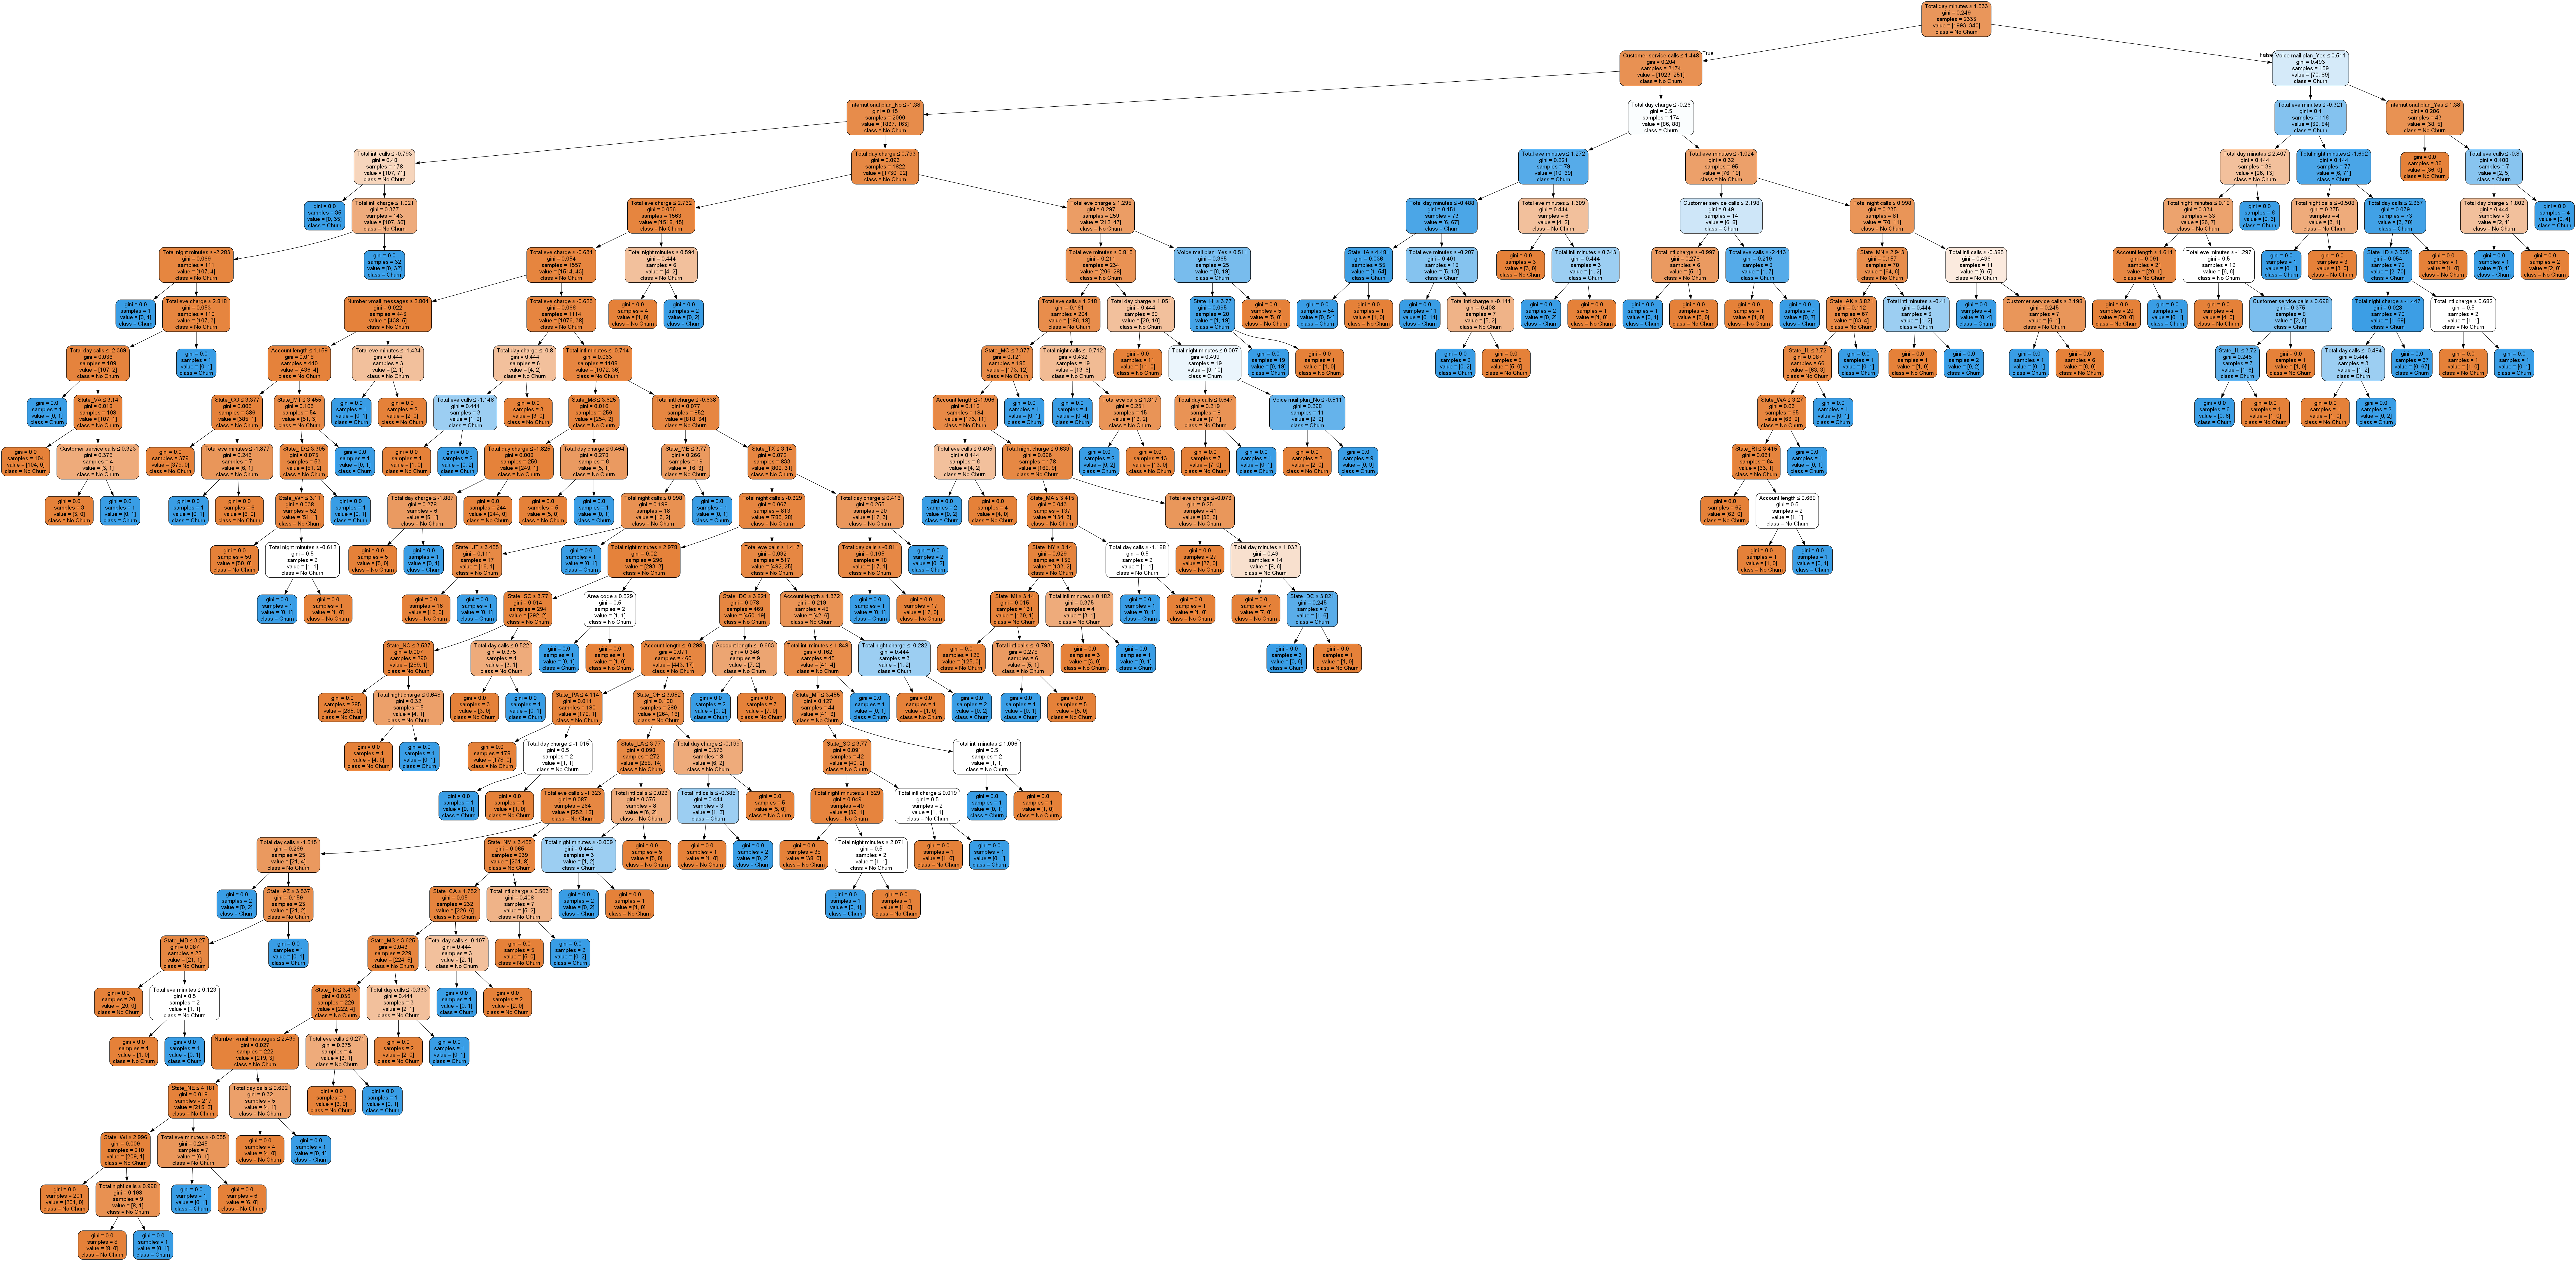

In [13]:
# Train a Decision Tree Classifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = clf_tree.predict(X_test)

# Evaluate the classifier
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

# Export the decision tree visualization
dot_data = export_graphviz(
    clf_tree, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=['No Churn', 'Churn'], 
    filled=True, 
    rounded=True, 
    special_characters=True
)

# Create a Graphviz Source object from the dot data and display the decision tree
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("decision_tree")
Image(filename="decision_tree.png")



In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracies.append(accuracy)
    print(f"K={k}: Accuracy={accuracy}")

# Select the best K value
optimal_k = accuracies.index(max(accuracies)) + 1
print(f"Optimal K value: {optimal_k}")


K=1: Accuracy=0.821
K=2: Accuracy=0.86
K=3: Accuracy=0.854
K=4: Accuracy=0.858
K=5: Accuracy=0.853
K=6: Accuracy=0.861
K=7: Accuracy=0.861
K=8: Accuracy=0.86
K=9: Accuracy=0.859
K=10: Accuracy=0.861
K=11: Accuracy=0.861
K=12: Accuracy=0.857
K=13: Accuracy=0.857
K=14: Accuracy=0.857
K=15: Accuracy=0.857
K=16: Accuracy=0.857
K=17: Accuracy=0.857
K=18: Accuracy=0.857
K=19: Accuracy=0.857
K=20: Accuracy=0.857
Optimal K value: 6


In [19]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

       False       0.86      1.00      0.92       857
        True       0.75      0.04      0.08       143

    accuracy                           0.86      1000
   macro avg       0.81      0.52      0.50      1000
weighted avg       0.85      0.86      0.80      1000

Accuracy: 0.861


In [20]:
# Train a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the classifier
print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

       False       0.86      0.98      0.92       857
        True       0.42      0.07      0.12       143

    accuracy                           0.85      1000
   macro avg       0.64      0.53      0.52      1000
weighted avg       0.80      0.85      0.81      1000

Accuracy: 0.853


In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

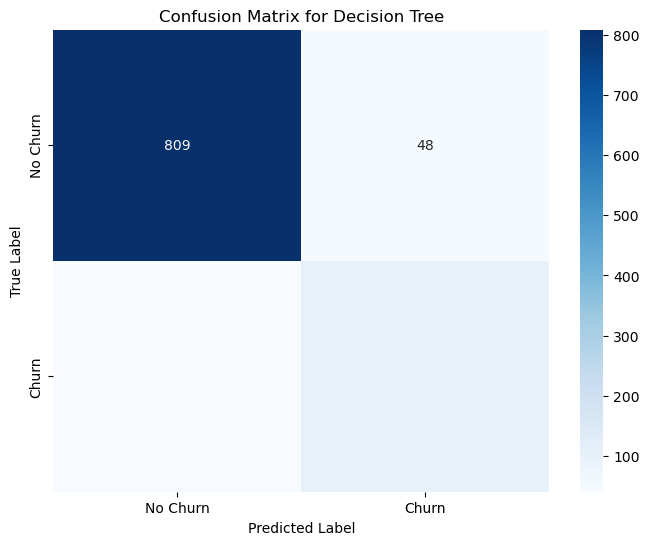

In [23]:
# Predict on the test set
y_pred_tree = clf_tree.predict(X_test)

# Generate the confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


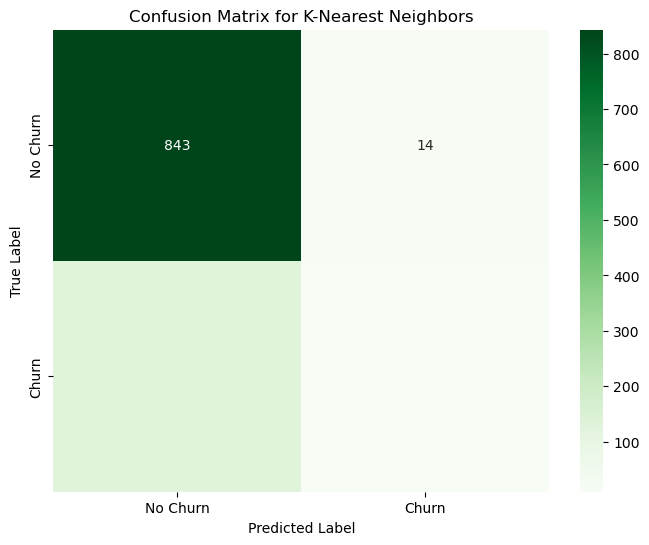

In [24]:
# Predict on the test set using KNN
y_pred_knn = knn.predict(X_test_scaled)

# Generate the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

In [58]:
df = pd.read_csv("telecom_churn.csv")

df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
df.drop(["State", "Churn"], axis=1, inplace=True)

In [59]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [60]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(
    df.values, y, test_size=0.3, random_state=17
)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [61]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)  # 0.94

0.94

In [62]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout, knn_pred)  # 0.89

0.89

In [63]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {"max_depth": range(1, 11), "max_features": range(4, 19)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [64]:
tree_grid.best_params_  # {'max_depth': 6, 'max_features': 17}

{'max_depth': 6, 'max_features': 17}

In [65]:
tree_grid.best_score_  # 0.94256322331761677

0.94257014456259

In [66]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))  # 0.946

0.946

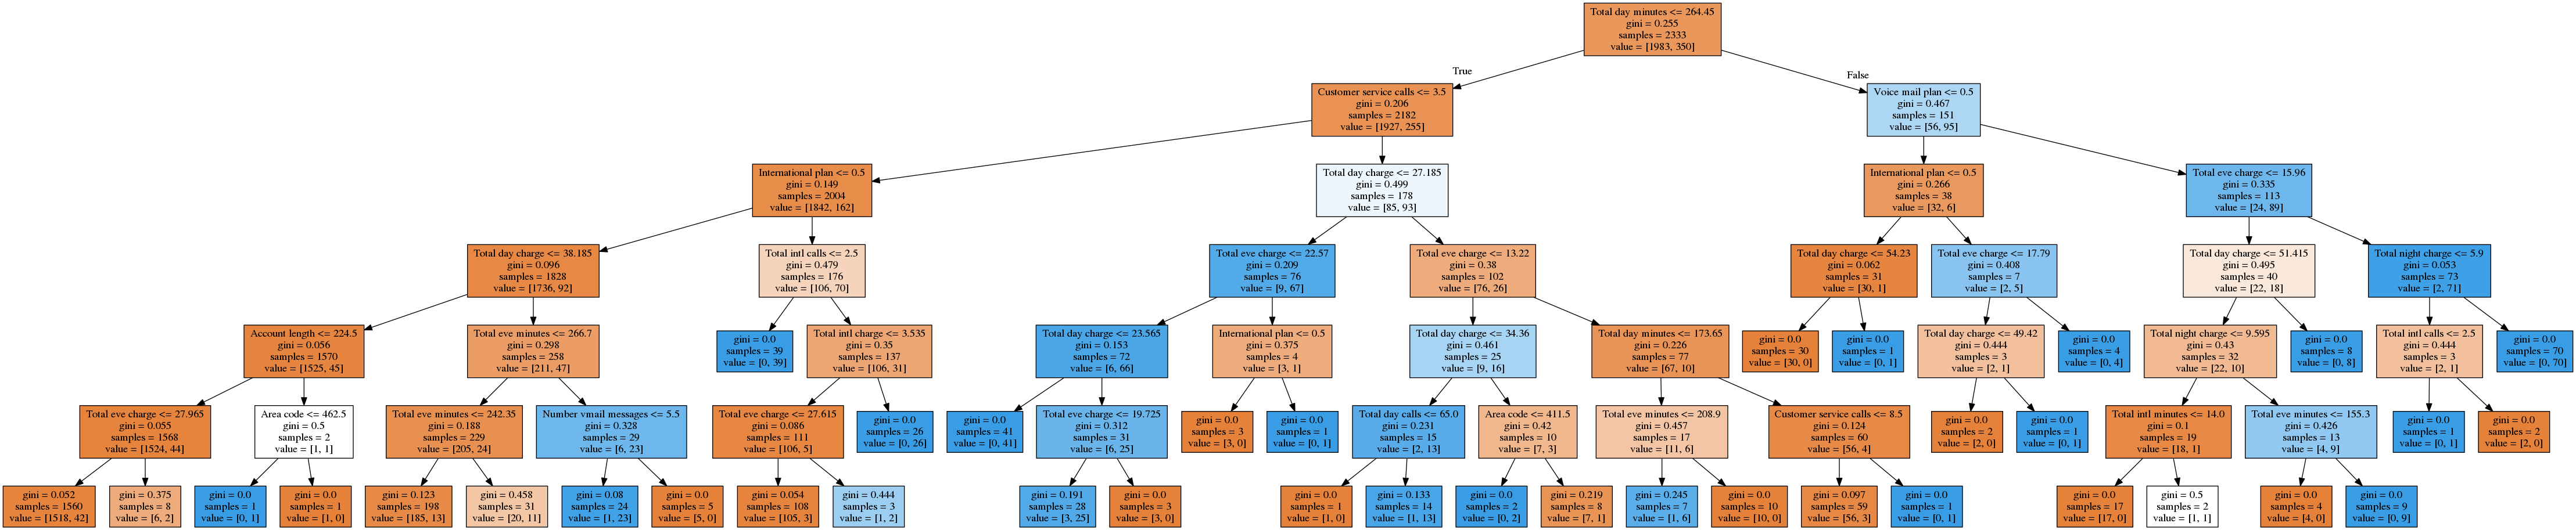

In [67]:
# Create a Graphviz Source object from the dot data and display the decision tree
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("decision_tree")
Image(filename="topic3_decision_tree4.png")

In [ ]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

In [69]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))  # 0.89

0.89

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor if applicable

# Define the RandomForestClassifier (or RandomForestRegressor)
forest = RandomForestClassifier()  # or RandomForestRegressor if applicable

# Define the parameter grid
forest_params = {"max_depth": range(6, 12), "max_features": range(4, 19)}

# Initialize the GridSearchCV object
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

# Fit the grid search on the training data
forest_grid.fit(X_train, y_train)

# Get the best parameters and best score
print(forest_grid.best_params_, forest_grid.best_score_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'max_depth': 11, 'max_features': 5} 0.9515664776539137


In [88]:
forest_params = {"max_depth": range(6, 12), "max_features": range(4, 19)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_  # ({'max_depth': 9, 'max_features': 6}, 0.951)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


({'max_depth': 9, 'max_features': 6}, 0.9511372931045574)

In [84]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))  # 0.949

0.9494233119813256


In [85]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))  # 0.953

0.953

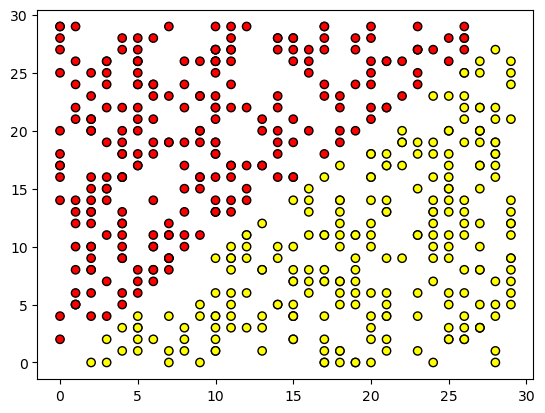

In [86]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)


X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="autumn", edgecolors="black");

In [91]:
import numpy as np

def get_grid(data, step_size=0.01, margin=1):
    x_min, x_max = data[:, 0].min() - margin, data[:, 0].max() + margin
    y_min, y_max = data[:, 1].min() - margin, data[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                         np.arange(y_min, y_max, step_size))
    return xx, yy


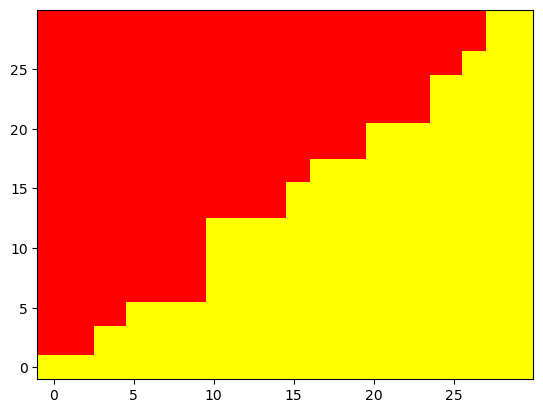

In [92]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)
xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")


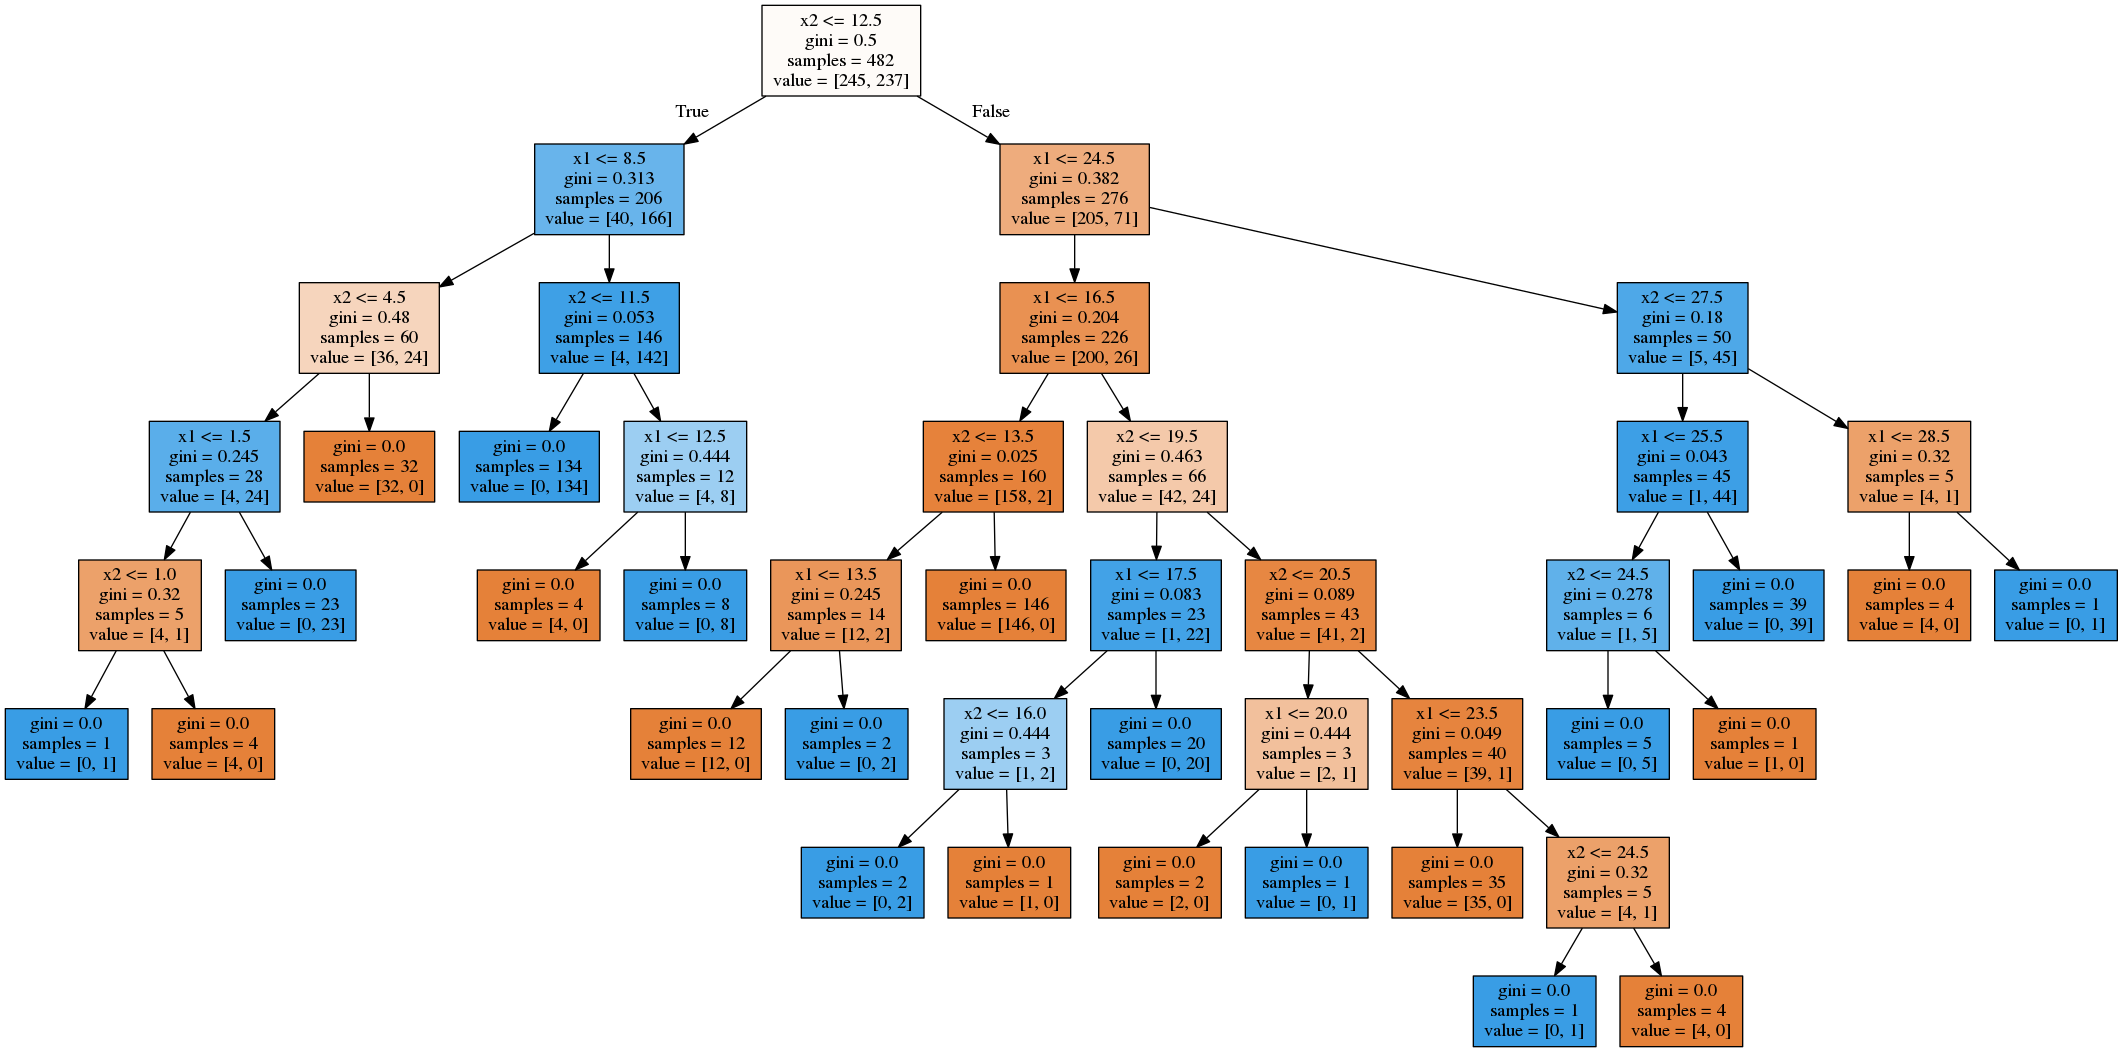

In [93]:
# Create a Graphviz Source object from the dot data and display the decision tree
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("decision_tree")
Image(filename="topic3_decision_tree5.png")

In [65]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
# Now, you can fit the model
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

# Define the get_grid function
xx, yy = get_grid(X)
return xx, yy

# Assuming you have defined X and y
X = X
y = y

# Check the shape of X
if X is not Ellipsis:  # Check if X is not an ellipsis object
    print(X.shape)
else:
    print("X is Ellipsis")

# If X is a 1D array (a single feature), reshape it to a 2D array
if X is not Ellipsis and len(X.shape) == 1:  # Check if X is not an ellipsis object
    X = X.reshape(-1, 1)



# Rest of your code
xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    X[:, 0], X[:, 1], c=y, s=100, cmap="autumn", edgecolors="black", linewidth=1.5
)
plt.title("Easy task, kNN. Not bad")
plt.show()



IndentationError: unexpected indent (1300834096.py, line 9)

In [19]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0, :].reshape([8, 8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

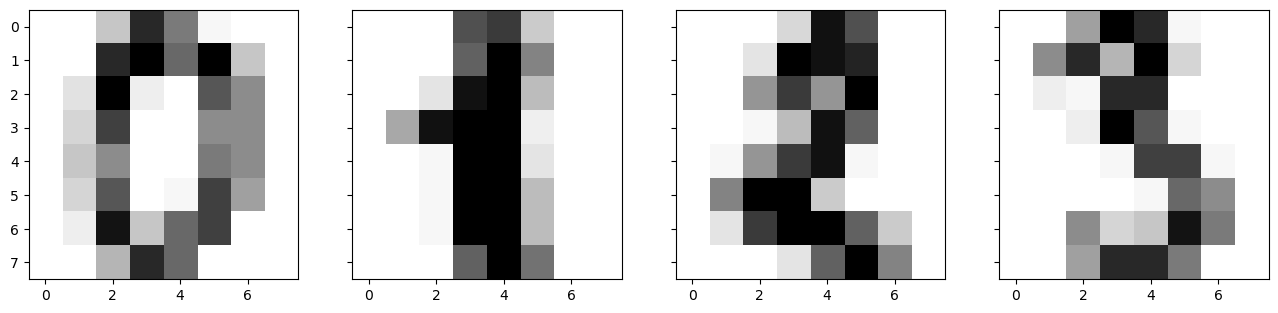

In [20]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys");

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=10))]
)


In [51]:
tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

In [52]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(
    y_holdout, tree_pred
)  # (0.976, 0.666)

(0.9633333333333334, 1.0)

In [39]:
from sklearn.model_selection import GridSearchCV

tree_params = {
    "max_depth": [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
    "max_features": [1, 2, 3, 5, 10, 20, 30, 50, 64],
}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [40]:
tree_grid.best_params_, tree_grid.best_score_  # ({'max_depth': 20, 'max_features': 64}, 0.844)

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [42]:
from sklearn.model_selection import cross_val_score

np.mean(
    cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)
)  # 0.987

0.9864858028204642

In [54]:
from sklearn.ensemble import RandomForestClassifier
np.mean(
    cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5)
)  # 0.935

1.0

In [46]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # first feature is proportional to target
    x1 = 0.3 * y

    # other features are noise

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y


X, y = form_noisy_data()

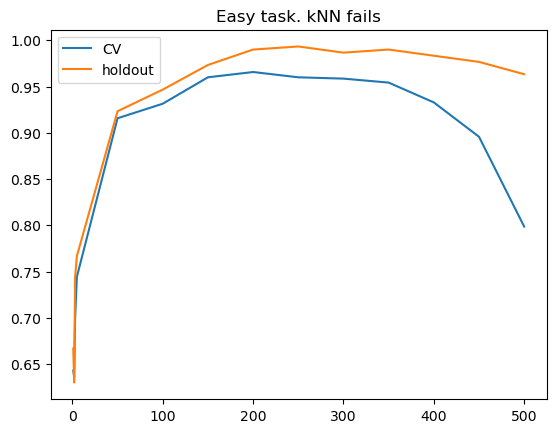

In [49]:
from sklearn.metrics import accuracy_score


X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)

from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn_pipe = Pipeline(
        [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    )
    cv_scores.append(np.mean(cross_val_score(knn_pipe, X_train, y_train, cv=5)))
    knn_pipe.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn_pipe.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label="CV")
plt.plot(n_neighb, holdout_scores, label="holdout")
plt.title("Easy task. kNN fails")
plt.legend();

In [50]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print("Decision tree. CV: {}, holdout: {}".format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0
